In [0]:
import numpy as np
import keras
from scipy.io import wavfile
keras.__version__
np.random.seed(123)

Using TensorFlow backend.


In [0]:
from keras import models
from keras import layers
from keras import utils


model = models.Sequential()
model.add(layers.Conv1D(filters=64,kernel_size= 129, padding='same',input_shape=(24000,1)))
model.add(layers.MaxPooling1D(pool_size=8))
model.add(layers.Reshape((3000,64,1)))
model.add(layers.Conv2D(filters=96, kernel_size=(61,1),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(8,1)))
model.add(layers.Conv2D(filters=128, kernel_size= (35,1), padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(4,1)))
model.add(layers.Conv2D(filters=160, kernel_size= (17,1), padding = 'same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(12,1)))
model.add(layers.AveragePooling2D((5,1)))
model.add(layers.Flatten())
model.add(layers.MaxoutDense(output_dim=128,nb_feature=2))
model.add(layers.Dropout(0.5))
model.add(layers.MaxoutDense(output_dim=64, nb_feature=2))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))




/usr/local/lib/python3.6/dist-packages/keras/legacy/layers.py:74: UserWarning: The `MaxoutDense` layer is deprecated and will be removed after 06/2017.
  warnings.warn('The `MaxoutDense` layer is deprecated '


In [0]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_24 (Conv1D)           (None, 24000, 64)         8320      
_________________________________________________________________
max_pooling1d_24 (MaxPooling (None, 3000, 64)          0         
_________________________________________________________________
reshape_24 (Reshape)         (None, 3000, 64, 1)       0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 3000, 64, 96)      5952      
_________________________________________________________________
max_pooling2d_70 (MaxPooling (None, 375, 64, 96)       0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 375, 64, 128)      430208    
_________________________________________________________________
max_pooling2d_71 (MaxPooling (None, 93, 64, 128)       0         
__________

In [0]:

numSamples = 2
dummyTraining = np.random.random((numSamples,24000,1))
dummyLabel = numSamples * [0]
for i in range(numSamples):  
  if (np.mean(dummyTraining[i])>0.5):
    dummyLabel[i]=1
  else:
    dummyLabel[i]=0
   
dummyLabel[:10]

[1, 1]

In [0]:
history = model.fit(dummyTraining,
                    dummyLabel,
                    epochs=100,
                    batch_size=2)
original_hist = history

Epoch 1/100
2/2 [==============================] - 1s 337ms/step - loss: 1.2497 - acc: 0.0000e+00
Epoch 2/100
2/2 [==============================] - 0s 42ms/step - loss: 0.8021 - acc: 0.0000e+00
Epoch 3/100
2/2 [==============================] - 0s 41ms/step - loss: 0.7619 - acc: 0.0000e+00
Epoch 4/100
2/2 [==============================] - 0s 41ms/step - loss: 0.7304 - acc: 0.0000e+00
Epoch 5/100
2/2 [==============================] - 0s 41ms/step - loss: 0.6903 - acc: 1.0000
Epoch 6/100
2/2 [==============================] - 0s 40ms/step - loss: 0.5542 - acc: 1.0000
Epoch 7/100
2/2 [==============================] - 0s 40ms/step - loss: 0.0228 - acc: 1.0000
Epoch 8/100
2/2 [==============================] - 0s 40ms/step - loss: 1.7464e-05 - acc: 1.0000
Epoch 9/100
2/2 [==============================] - 0s 40ms/step - loss: 1.6391e-05 - acc: 1.0000
Epoch 10/100
2/2 [==============================] - 0s 41ms/step - loss: 1.5915e-05 - acc: 1.0000
Epoch 11/100
2/2 [======================

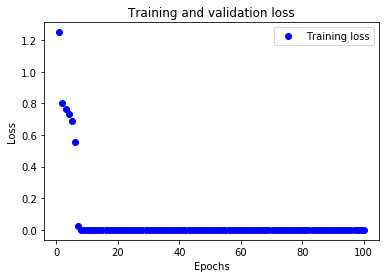

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

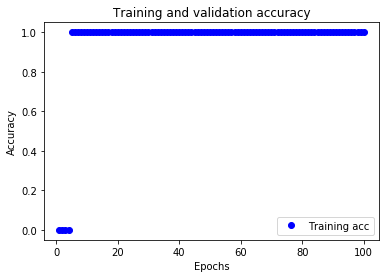

In [0]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()